In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scripts.helpful_scripts import annual, cash_flow
from scripts.equipment import pump, heatex, heater, Vvessel, Hvessel
from numpy_financial import numpy_financial as npf

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [42]:
raw_materials = pd.DataFrame({'Component': ['Ethylbenzene', 'Waste Water', 'Catalyst'],
                                'Price': [0.5, 0.005, 1], #($/lb_m)
                                'Flowrate': [
                                    ((27827.3*0.959))*8000, (17872.6 - (17524.6*0.9995))*8000, 22857.14]}).reset_index() # lb_m/op_yr

products = pd.DataFrame({'Component': ['Styrene', 'Toluene'],
                          'Price': [0.62, 0.44], #($/lb_m)
                          'Flowrate': [22088.8*8000, 4263.01*8000]}).reset_index() # lb_m/op_yr
                    
utilities = pd.DataFrame({'Utility': ['LPS', 'MPS', 'HPS', 'Natural Gas', 'Electricity', 'BFW', 'CW', 'RW'],
                          'Price': [13.28, 14.19, 17.70, 11.00, 0.06, 2.45/1000, 0.354, 4.43],
                          'Unit': ['GJ', 'GJ', 'GJ', 'GJ', 'kW-h', 'kg', 'GJ', 'GJ'],
                          'Usage': [0, (13.9766+29.1843)*8000, 0, (183.194)*8000, 0.176*8000, 0, (139.902+10.7555+29.1795+9.23)*8000, 0]}).reset_index()

credits = pd.DataFrame({'Utility': ['LPS', 'MPS', 'HPS', 'Natural Gas', 'Fuel', 'Electricity', 'BFW', 'CW', 'RW'],
                          'Price': [13.28, 14.19, 17.70, 11.00, 9.00, 0.06, 2.45/1000, 0.354, 4.43],
                          'Unit': ['GJ', 'GJ', 'GJ', 'GJ', 'GJ', 'kW-h', 'kg', 'GJ', 'GJ'],
                          'Usage': [0, 0, 0, 0, (24.708+9.4886)*8000, 0, 0, 0, 0]}).reset_index()

waste_treatment = 27.6346*8000*6
interest = 0.2 # interest rate
n = 10 # project life

In [43]:
# Equipment Pricing
B1 = heater(63609/0.8) * 8
B7 = pump(0.176134/0.8)*8
R101 = Hvessel(1.57)*8
B2 = heatex(28.5836)*8
R102 = Hvessel(1.57)*8
E102 = heatex(454.073)*8
V101 = Vvessel(6.08)*4
T101 = (Vvessel(110.09) + heatex(118.98) + heatex(152.028))*4
T102 = (Vvessel(710.434) + heatex(111.44) + heatex(354.559))*4
valves = 2749.70*4*4 + 2749.7*8
#total_installed_cost = (B1 + B7 + R101 + B2 + R102 + E102 + V101 + T101 + T102 + valves)
print('${:,.2f}'.format(total_installed_cost))
print('${:,.2f}'.format(T102))
total_installed_cost = 35_900_000

$1,605,380,005.02
$264,486,673.94


In [44]:
print('Raw Materials')
display(raw_materials)
print('\nProducts')
display(products)
print('\nUtilities')
display(utilities)
print('\nCredits')
display(credits)

Raw Materials


,index,Component,Price,Flowrate
0,0,Ethylbenzene,0.500,2.134910e+08
1,1,Waste Water,0.005,2.854098e+06
2,2,Catalyst,1.000,2.285714e+04



Products


,index,Component,Price,Flowrate
0,0,Styrene,0.62,176710400.0
1,1,Toluene,0.44,34104080.0



Utilities


,index,Utility,Price,Unit,Usage
0,0,LPS,13.28000,GJ,0.0
1,1,MPS,14.19000,GJ,345287.2
2,2,HPS,17.70000,GJ,0.0
3,3,Natural Gas,11.00000,GJ,1465552.0
4,4,Electricity,0.06000,kW-h,1408.0
5,5,BFW,0.00245,kg,0.0
6,6,CW,0.35400,GJ,1512536.0
7,7,RW,4.43000,GJ,0.0



Credits


,index,Utility,Price,Unit,Usage
0,0,LPS,13.28000,GJ,0.0
1,1,MPS,14.19000,GJ,0.0
2,2,HPS,17.70000,GJ,0.0
3,3,Natural Gas,11.00000,GJ,0.0
4,4,Fuel,9.00000,GJ,273572.8
5,5,Electricity,0.06000,kW-h,0.0
6,6,BFW,0.00245,kg,0.0
7,7,CW,0.35400,GJ,0.0
8,8,RW,4.43000,GJ,0.0


In [45]:
finances, annual_cost = annual(products, raw_materials, total_installed_cost, 0.15, n, utilities, waste_treatment, credits)
finances

,0,1
0,Credits,"$2,462,155.20"
1,Revenue,"$124,566,243.20"
2,Raw materials,"-$106,782,650.43"
3,Equipment loan,"-$7,153,149.04"
4,Utilities,"-$21,556,219.59"
5,Waste Treatment,"-$1,326,460.80"
6,Profit,"$-9,790,081.47"


In [46]:
npv = npf.npv(0.2, annual_cost)
print('Net Present Value: ${:,.2f}'.format(npv))

Net Present Value: $-49,253,571.93


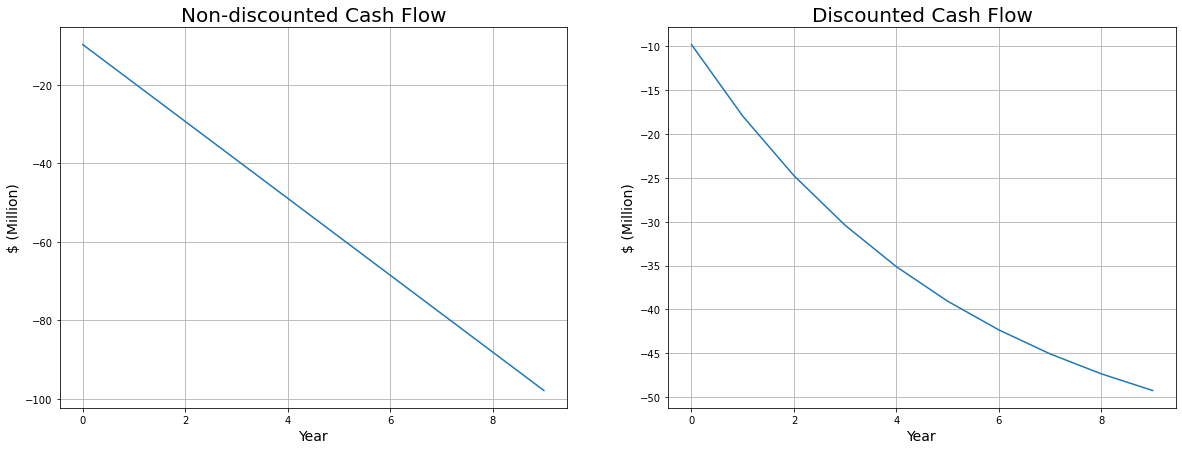

In [47]:
cash_flow(annual_cost, 0.2)

In [48]:
# Add Monte Carlo Simulation
# Improve cash flow calcs and graphs
# Improve equipment pricing